105308045 風管四 林庭萱

本次更改的地方：
1. kenel size改為(5,5)
2. fliter數量改為(16,36,56)
3. 全連結層改為兩層分別是(30,80) 
4. 訓練資料每次100筆共訓練20次

跑出後的正確率為0.8563

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train),(x_test, y_test)=fashion_mnist.load_data()

1. 資料處理

In [3]:
x_train=x_train.reshape(60000, 28, 28, 1) /255

In [4]:
x_test=x_test.reshape(10000, 28, 28, 1)/255

2. 將向量轉為二進位制

In [6]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

3. 讀入必要函式

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

4. 建立模組

In [8]:
model= Sequential()
#第一層
model.add(Conv2D(16, (5,5), padding='same', input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))  #output(14,14,16)

#第二層
model.add(Conv2D(36, (5,5), padding='same', activation='relu')) #output(14,14,36)
model.add(MaxPooling2D(pool_size=(2,2))) #output(7,7,36)

#第三層
model.add(Conv2D(56, (5,5), padding='same', activation='relu')) #output(7,7,56)
model.add(MaxPooling2D(pool_size=(2,2))) #output(3,3,56)

5. 拉平

In [9]:
model.add(Flatten()) 

In [10]:
model.add(Dense(30, activation='relu'))  #第一層 輸出神經元數量=30
model.add(Dense(80, activation='relu')) #第二層 輸出神經元數量=80
model.add(Dense(10, activation='softmax'))  #輸出10的矩陣 加起來=1

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 56)          50456     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 56)          0         
_________________________________________________________________
flatten (Flatten)            (None, 504)               0

6. 開始訓練

In [12]:
model.compile(loss='mse', optimizer=SGD(lr=0.087), metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, batch_size=100, epochs=20) #批量訓練每次100筆資料 訓練20次

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 105s 2ms/sample - loss: 0.0896 - accuracy: 0.2147
Epoch 2/20
60000/60000 [==============================] - 101s 2ms/sample - loss: 0.0840 - accuracy: 0.3278
Epoch 3/20
60000/60000 [==============================] - 95s 2ms/sample - loss: 0.0502 - accuracy: 0.6217
Epoch 4/20
60000/60000 [==============================] - 95s 2ms/sample - loss: 0.0395 - accuracy: 0.7096
Epoch 5/20
60000/60000 [==============================] - 95s 2ms/sample - loss: 0.0357 - accuracy: 0.7403
Epoch 6/20
60000/60000 [==============================] - 95s 2ms/sample - loss: 0.0333 - accuracy: 0.7616
Epoch 7/20
60000/60000 [==============================] - 95s 2ms/sample - loss: 0.0312 - accuracy: 0.7782
Epoch 8/20
60000/60000 [==============================] - 95s 2ms/sample - loss: 0.0298 - accuracy: 0.7900
Epoch 9/20
60000/60000 [==============================] - 97s 2ms/sample - loss: 0.0286 - accuracy: 0.8010
Epoch 10/20


7. 展示成果


In [16]:
result = model.predict_classes(x_test)
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
def my_predict(n):
    print('CNN 預測： ', class_names[result[n]])
    x=x_test[n].reshape(28,28)
    plt.imshow(x,cmap='Greys')
    
    

CNN 預測：  Sandal


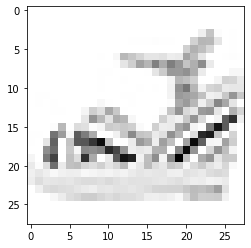

In [19]:
n=288
my_predict(n)